### Player rating: Self-Comparisoin

In [461]:
import pandas as pd
import seaborn as sns
import math

In [462]:
data_2021 = pd.read_csv('test_data/2021_fantasy_scores.csv')
data_2020 = pd.read_csv('test_data/2020_fantasy_scores.csv')
data_2021 = data_2021[['player_name','player_id','matchup','game_date','fantasy_score','fantasy_score_cumul']]
data_2020 = data_2020[['player_name','player_id','matchup','game_date','fantasy_score','fantasy_score_cumul']]

data = pd.concat([data_2020, data_2021])
data = data.sort_values(by=['player_id','game_date']).reset_index(drop=True)

In [463]:
# expensive code atm. need to refactor using numpy arrays or regular lists
def n_game_avg(row, n=10):
    n_games = (data.loc[(data['game_date'] < row['game_date']) & (data['player_id'] == row['player_id'])]
                   .sort_values(by='game_date', ascending = False)
                   .head(n))
    return np.mean(n_games['fantasy_score'])

In [464]:
# this takes forever. so get it over w/
# data_2021['10_game_avg'] = data_2021.apply(lambda x: n_game_avg(x), axis=1)

In [466]:
df = pd.read_csv('test_data/player_self_comparison.csv')
df['difference'] = df['fantasy_score'] - df['10_game_avg']

<AxesSubplot:xlabel='fantasy_score', ylabel='Count'>

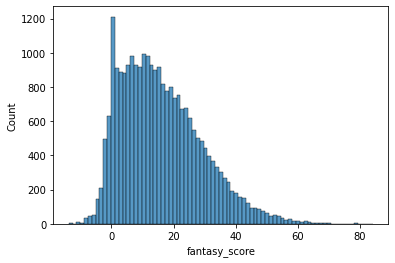

In [428]:
sns.histplot(df['fantasy_score'])

16.081028417849097
0.25     5.9
0.50    14.2
0.75    24.2
Name: fantasy_score, dtype: float64


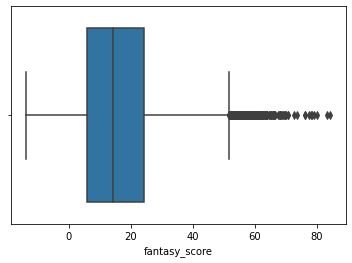

In [450]:
sns.boxplot(data=df, x=df['fantasy_score'],orient=0)
print(np.mean(df['fantasy_score']))
print(df['fantasy_score'].quantile([0.25,.5,.75]))

<AxesSubplot:>

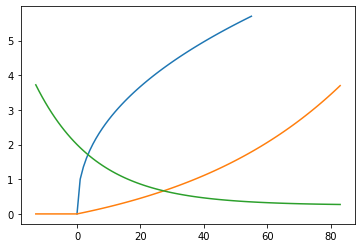

In [476]:
def difference_weight(fs,av=None):
    if fs == av or (fs == 0 and not av):
        return 0
    
    if av:
        x = abs(fs - av)
        sign = 1 if fs > av else -1
    else:
        x = fs
        sign = 1 if fs > 0 else -1
        
    return sign * math.e**(math.log10(x))

def fs_weight(x, sign):
    # did better than average
    if sign > 0:
        if x <= 0:
            return 0
        # 0.0286424
        return (math.e**(0.0186424*x) - 1)
    # did worse than average
    else:
        return (1.75/math.e**(0.05269*x)) + .25

diff_range = range(int(min(abs(df['difference']))), int(max(abs(df['difference']))))
values = range(int(min(df['fantasy_score'])), int(max(df['fantasy_score'])))
sns.lineplot(x=diff_range, y=[difference_weight(x) for x in diff_range])
sns.lineplot(x=values, y=[fs_weight(x, 1) for x in values],color='green')
sns.lineplot(x=values, y=[fs_weight(x,-1) for x in values],color='red')

<AxesSubplot:xlabel='fantasy_score', ylabel='Count'>

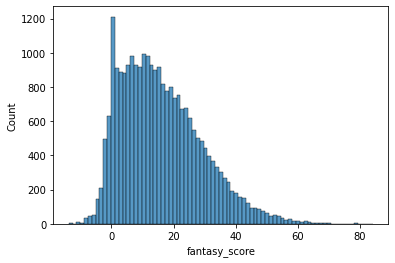

In [477]:
sns.histplot(df['fantasy_score'])